# Python基礎～**速習！機械学習**～
### 機械学習の要点解説と練習問題など

## 1. 機械学習とは（ざっくりと）

ここでいう機械学習とは教師あり学習のこと。  
教師あり学習は「分類」と「回帰」の２通りがあります。  
1. 分類：あるデータを見て、そのデータがどのカテゴリに属するかを判定するもの
2. 回帰：与えられたデータの分布を近似することで、データのない場所での値を予測するもの  
今回は回帰について説明します。

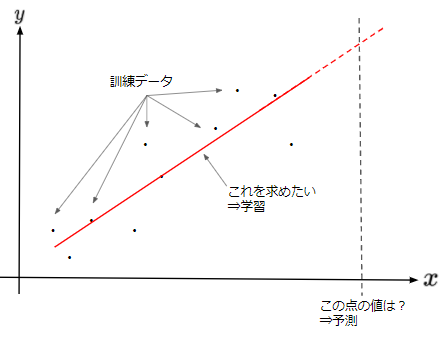

### 1-1. 訓練データ  
適切な関数（上のグラフで言えば赤い線）を求めるために用意するのが訓練データ（学習データとも呼ばれます）。  
訓練データは
$$ X = [x_1,x_2,\cdots,x_n]$$
$$ Y = [y_1,y_2,\cdots,y_n]$$
という$X$と$Y$のペアの形であたえられ、$X$を特徴ベクトル（の集合）、$Y$をラベル（の集合）と呼びます。  

訓練データを集めたり、集めたデータを整形したり特徴を取り直したりするなどして機械学習に適した形式に落とし込むところが一番重要で時間を使うところです。

### 1-2. 学習  
訓練データが与えられたとして、次は学習です。上図の赤い線を求めることに該当します。  
学習は次の２ステップから成ります。

1. 学習モデルの決定:まずはどういった関数で与えられたデータを近似するかを決めます。  
ここでは学習モデルを$f_{\theta}$と書きます。$\theta$はパラメータを表しています。
上のグラフの例だと、
$$ f_{\theta}(x) = ax+b$$
と書けるので、$\theta=\{a,b\}$ということになります。  
例えば、$x$は昨日の最高気温として、$f_{\theta}(x)$で今日の最高気温を予測する、という感じ。
2. 学習：訓練データを使ってモデルを学習させます。  
訓練データとして与えられた一つ一つの特徴ベクトル$x_i$に対して、なるべく$f(x_i)$を$y_i$に近づけたい、というのが目的となります。  
従って、学習とは
$$ \sum_{i=1}^n(y_i-f_{\theta}(x_i))^2$$
をパラメータ$\theta$を調節することによってなるべく小さくすることである、と言うことができます。  
このなるべく小さくしたい関数は、目的関数と呼ばれます。  
特に上の目的関数は２乗の和の形をしているのでMSE(Mean Squared Error)と呼ばれています。


## 2. scikit-learnにチャレンジ  
理屈は以上。
次は実際に手を動かして機械学習を体験してみます。  
訓練データが与えられた後は、ほとんど定型作業ということがわかると思います。

### 訓練データの用意(1-1に対応）

In [8]:
X = [[1],[2],[3],[4],[5],[6]]  # Xの一つ一つの要素は特徴ベクトルをイメージしているので[]で囲っている
Y = [7.5, 12.1, 13.5, 17.1, 19.7, 25.0]  # y=3x+5をイメージしています

### 学習（1-2に対応）  
scikit-learnは機械学習に役立つツールを集めたライブラリのこと。ほぼこれ一択と思ってよい。  
まずは学習モデルを決めて、sklearnからとってきます。どういうモデルを使うかは好み。  
今回は$y=ax+b$という学習モデルをイメージしているので線形回帰の学習モデル"LinearRegression"を引っ張ってきます。  
他にどんな学習モデルがあるのかは、scikit-learnのwebページで調べるとか、教科書を読むとかで身につけてください。

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# モデルのインスタンス化
lr = LinearRegression()

In [6]:
# 学習：訓練データX,Yを使います
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

はい。以上で学習完了。  
以下は、学習済みのモデルを使っていろいろと。

In [7]:
# 予測
lr.predict([[4]])  # 4の位置に当たる特徴ベクトルを[]で囲んだのが入力、というイメージです

array([17.44380952])

In [ ]:
# 予測
lr.predict([[10]])  # 10の位置にはどのような値が対応するのか？を調べた

array([36.96952381])

In [ ]:
# そもそもパラメータ$\theta=(a,b)$はどんな値になっているのか？
a = lr.coef_[0]
b = lr.intercept_
a,b

(3.254285714285715, 4.426666666666666)

In [ ]:
# 学習モデルがどれくらいMSEを小さくできたか。（学習モデルの評価）
# 自分でlr.predict()を使ってMSEを計算するのもよいけれど、sklearnにすでに備わっています。
from sklearn.metrics import mean_squared_error
mean_squared_error(Y,lr.predict(X))

0.6794603174603182

### 学習結果の可視化  
ここでは「こういうものか」程度の見方でOK。  

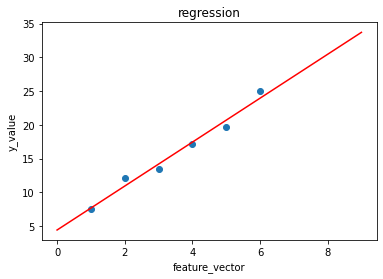

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()  #キャンバスを作成するイメージ
ax = fig.add_subplot(111)  #１行１列のグラフの１番目
ax.scatter(X,Y)  # 訓練データのプロット（散布図）
x = [[i] for i in range(10)]  # 学習モデルをプロットする際のx座標
ax.plot(x,lr.predict(x),color="red")  # 学習モデルのプロット（直線）
ax.set(ylabel="y_value",xlabel="feature_vector",title="regression") #ｙ軸のラベル、ｘ軸のラベル、グラフのタイトル
plt.show()  #描画コマンド

## 練習問題    
解説では１次元空間上での関数を近似しました。  
練習問題では２次元空間を考えてみます。次元が上がってもやることは同じ。

### 問題1. $y = a_1x_1+a_2x_2+b$となる関数をまず設定せよ。  
例えば、$x_1$が昨日の最高気温、$x_2$が一昨日の最高気温として、$y$を今日の最高気温の予測値、という感じ。  
ヒント：要するに適当な$a_1,a_2,b$を決めてください。  
この関数を使って訓練データを作ります。

### 問題2. 問題1で作った関数を使って、訓練データを作れ。ただし、データの要素数は20とする。
ヒント：$X=[{\bf x}_1,{\bf x}_2,\cdots,{\bf x}_{20}]$ ただし、${\bf x}_i=[x_{1i},x_{2i}]$、$Y=[y_1,y_2,\cdots,y_{20}]$を作る。  
このとき、きっちり$y=a_1x_1+a_2x_2+b$を満たす値ではなくて適当に散らばらるようにすること。  

### 問題3. sklearnライブラリから適当な学習モデルをインポートせよ。
ヒント：とりあえずLinearRegressionが無難だけれども、sklearnを調べたらいろいろできます。  
例えば決定木  
```from sklearn.tree import DecisionTreeRegressor```  
とか。

### 問題4. 問題2で作った学習データを使って学習を実行せよ。
ヒント：学習モデルのインスタンス化とfit()メソッド。

### 問題5. 学習で使っていない特徴ベクトルの点について予測を実行せよ。
ヒント：predict()メソッドを使う。このとき、入力の形式は$[{\bf x}]$となることに注意。

### 問題6. 学習で得られたパラメータをチェックして、真のパラメータとどれだけ近いか確認せよ。
ヒント：.coef_や.intercept_を使う。

### 発展問題. 学習データ数を$n=100$とする。  
### そのうち７０個を訓練データとして学習用に使い、残りの３０個をテストデータとして学習後のモデルの評価に用いる。訓練データでのMSEとテストデータでのMSEはどのように異なるか？（または同じか？） 
ヒント：いちいち訓練データを手入力していたら面倒くさいので、どうやったらラクにできるか、というのがひとつめ。  
学習データの評価のために学習完了時のMSEとテストデータに対するMSEを比較する。MSEの値をテストデータに対して計算して求めるやりかたでもよいが、例題でやったように  
```from sklearn.metrics import mean_squared_error```  
としてmean_squared_errorを用いて評価してもよい。

以上で、とりあえず速習！機械学習のコースは修了です。お疲れ様でした。  
ちなみに、教師あり学習の残りのひとつ「分類」についても全く同じ手順で行うことができます。（当然、訓練データや学習モデルは分類に対応するものを使わなければなりませんが、壁は限りなく低い！）  
**Enjoy Coding!**